<a href="https://colab.research.google.com/github/ninaaulia/customer_segmentation/blob/main/cohort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Segmentation**

# *A. Cohort Analysis*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

sns.set()

In [2]:
df = pd.read_csv('online.csv')
df.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom


In [3]:
df.shape

(70864, 9)

In [4]:
df.isnull().sum()

Unnamed: 0     0
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [5]:
df.drop('Unnamed: 0', inplace = True, axis = 1)
df.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID
count,70864.000000,70864.000000,70864.000000,70864.00000
mean,560639.843136,11.511233,3.063033,15552.19790
std,13176.494003,41.017582,31.894970,1595.50593
min,536365.000000,1.000000,0.001000,12747.00000
25%,549128.000000,2.000000,1.250000,14194.00000
50%,562012.500000,4.000000,1.950000,15525.00000
75%,572283.000000,12.000000,3.750000,16931.00000
max,581586.000000,4300.000000,8142.750000,18287.00000


In [6]:
df['InvoiceDate'] = df['InvoiceDate'].astype('datetime64[ns]') #convert datatype 'InvoiceDate' to datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70864 entries, 0 to 70863
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    70864 non-null  int64         
 1   StockCode    70864 non-null  object        
 2   Description  70864 non-null  object        
 3   Quantity     70864 non-null  int64         
 4   InvoiceDate  70864 non-null  datetime64[ns]
 5   UnitPrice    70864 non-null  float64       
 6   CustomerID   70864 non-null  int64         
 7   Country      70864 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 4.3+ MB


In [7]:
print('Min Date',  df['InvoiceDate'].min())
print('Max Date',  df['InvoiceDate'].max())

Min Date 2010-12-01 08:26:00
Max Date 2011-12-09 12:49:00


## Cohort Analysis

first step is create monthly cohorts based on the month each customer has made their first transaction

In [8]:
# function for parse the date
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

# create InvoiceMonth column
df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month)
# groupby CustomerID & InvoiceMonth, assign min InvoiceMonth
df['CohortMonth'] = df.groupby('CustomerID')['InvoiceMonth'].transform('min')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01


### Calculate time offset in days 

In [9]:
def get_dates(dates, column):
    year = dates[column].dt.year
    month = dates[column].dt.month
    day = dates[column].dt.day
    return year, month, day


invoice_year, invoice_month, _ = get_dates(df, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_dates(df, 'CohortMonth')

### Calculate time offset in days -2

In [10]:
# difference between invoice and cohort year & month
year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month
# year_diff, month_diff

In [11]:
df['Cohort_index'] = year_diff * 12 + month_diff + 1
# df['Cohort_index']

In [12]:
#cohort analysis 1
cohort_data = df.groupby(['CohortMonth', 'Cohort_index'])['CustomerID'].apply(pd.Series.nunique).reset_index()

count = cohort_data.pivot_table(index = 'CohortMonth',
                               columns = 'Cohort_index',
                               values = 'CustomerID')
count

Cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,716.0,246.0,221.0,251.0,245.0,285.0,249.0,236.0,240.0,265.0,254.0,348.0,172.0
2011-01-01,332.0,69.0,82.0,81.0,110.0,90.0,82.0,86.0,104.0,102.0,124.0,45.0,NaN
2011-02-01,316.0,58.0,57.0,83.0,85.0,74.0,80.0,83.0,86.0,95.0,28.0,NaN,NaN
2011-03-01,388.0,63.0,100.0,76.0,83.0,67.0,98.0,85.0,107.0,38.0,NaN,NaN,NaN
2011-04-01,255.0,49.0,52.0,49.0,47.0,52.0,56.0,59.0,17.0,NaN,NaN,NaN,NaN
2011-05-01,249.0,40.0,43.0,36.0,52.0,58.0,61.0,22.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,207.0,33.0,26.0,41.0,49.0,62.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,173.0,28.0,31.0,38.0,44.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,139.0,30.0,28.0,35.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### retention as percentage

In [13]:
cohort_size = count.iloc[:,0] 
retention = count.divide(cohort_size,axis = 0).round(1)

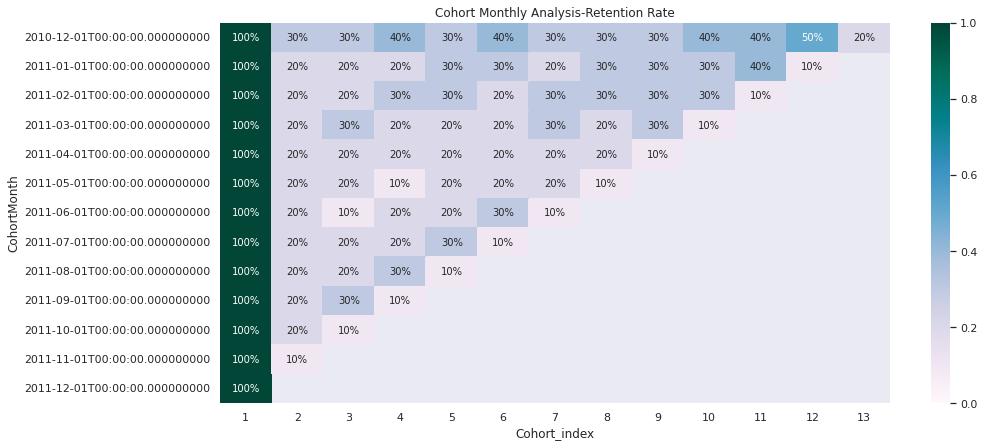

In [14]:
# visualize
plt.figure(figsize = (15,7))
plt.title('Cohort Monthly Analysis-Retention Rate')
sns.heatmap(data = retention,
           annot = True,
           fmt = '.0%',
           vmin = 0.0,
           cmap = 'PuBuGn')
plt.show()

* there is an retention rate of 34% for the Cohort Month 2010–12–01, with the highest retention rate occurring after 11 months 49% 
* despite the drop off in Month 12, 30-40% of visitors were still coming back until then.
* the highest retention rate was in the last 3 months (August– October2011).
* For all the other Cohort Months, the average retention rates are around 18–30%.